## Setup

### Import packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline

from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from wordcloud import WordCloud
from matplotlib import pyplot as plt

/anaconda3/envs/LP-NLP/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/anaconda3/envs/LP-NLP/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Load data

In [2]:
df = pd.read_csv("spam.csv", encoding="L1")
df = df.rename(
    columns = {
        "v1": "label",
        "v2": "text"
    }
)

df = df[["label", "text"]]

labels = df["label"].values
text = df["text"].values

### Build visualization functions

In [3]:
def make_word_cloud(words_array):
    
    """
    Takes an array of text and makes a word cloud from it.
    """
    
    words_str = " ".join([c.lower() for c in words_array])
    wordcloud = WordCloud().generate(words_str)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    return

def word_cloud_from_df(df, label):
    
    """
    Takes a DataFrame with columns labels and text.
    Visualizes all the text for a label as a word cloud.
    """
    
    words_array = df.loc[df["label"]==label, "text"].values
    make_word_cloud(words_array)
    
    return

### Build other functions and classes

In [4]:
class DenseTransformer(TransformerMixin):
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, y=None, **fit_params):
        return X.todense()        

## Visualize the data

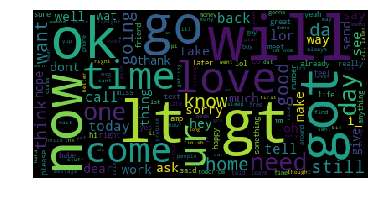

In [5]:
word_cloud_from_df(df, "ham")

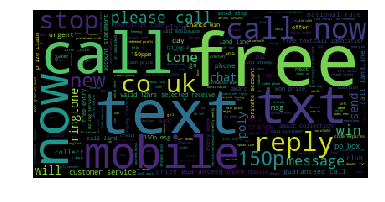

In [6]:
word_cloud_from_df(df, "spam")

## Process the data for learning

In [7]:
X = text
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
cv = CountVectorizer()

cv.fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

## Word counts as features

### Naive Bayes

In [9]:
# note: CountVectorizer returns a sparse matrix, while GaussianNB requires a dense matrix
cv_nb = Pipeline([
    ("count_vectorizer", CountVectorizer()),
    ("dense_transformer",  DenseTransformer()),
    ("naive_bayes", GaussianNB())
])

In [10]:
%%time
cv_nb.fit(X_train, y_train)

CPU times: user 1.58 s, sys: 367 ms, total: 1.95 s
Wall time: 946 ms


Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ...mer', <__main__.DenseTransformer object at 0x1a17cd9dd8>), ('naive_bayes', GaussianNB(priors=None))])

In [11]:
cv_nb_train_acc = cv_nb.score(X_train, y_train)
cv_nb_test_acc = cv_nb.score(X_test, y_test)

print(f"Word Count - Naive Bayes Train Accuracy {cv_nb_train_acc}")
print(f"Word Count - Naive Bayes Test Accuracy {cv_nb_test_acc}")

Word Count - Naive Bayes Train Accuracy 0.9432878679109835
Word Count - Naive Bayes Test Accuracy 0.9109834888729361


### Ada Boost

In [12]:
# note: AdaBoostClassifier() does not require a dense matrix and runs significantly faster with a sparse matrix
cv_ab = Pipeline([
    ("count_vectorizer", CountVectorizer()),
    ("ada_boost", AdaBoostClassifier())
])

In [13]:
%%time
cv_ab.fit(X_train, y_train)

CPU times: user 719 ms, sys: 10.5 ms, total: 730 ms
Wall time: 416 ms


Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [14]:
cv_ab_train_acc = cv_ab.score(X_train, y_train)
cv_ab_test_acc = cv_ab.score(X_test, y_test)

print(f"Word Count - Ada Boost Train Accuracy {cv_ab_train_acc}")
print(f"Word Count - Ada Boost Test Accuracy {cv_ab_test_acc}")

Word Count - Ada Boost Train Accuracy 0.9772672888250777
Word Count - Ada Boost Test Accuracy 0.9669777458722182
